In [15]:
# create the configuration of the low-fidelity model
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch

# get the accuracy metrics
from sklearn.metrics import r2_score

from mfbml.metrics import (
    mean_log_likelihood_value,
    normalized_mae,
    normalized_rmse,
)
from mfpml.models.hierarchical_kriging import HierarchicalKriging

from mfpml.models.gaussian_process import GaussianProcessRegression
# fix the random seed for reproducibility
seed = 1999
np.random.seed(seed)
torch.manual_seed(seed)

In [25]:
# read the data
data = pd.read_pickle("data.pkl")
# extract dataset
samples = data["samples"]
hf_samples = samples["hf"]
lf_samples = samples["lf"]
hf_responses = data["responses_lf1"]["hf"]
responses_lf1 = data["responses_lf1"]
responses_lf2 = data["responses_lf2"]
responses_lf3 = data["responses_lf3"]
test_samples = data["test_samples"]
test_hf_responses_noiseless = data["test_hf_responses_noiseless"]
test_hf_responses = data["test_hf_responses"]
test_lf1_responses = data["test_lf1_responses"]
test_lf2_responses = data["test_lf2_responses"]
test_lf3_responses = data["test_lf3_responses"]

In [17]:
sf_gpr = GaussianProcessRegression(
    design_space=np.array([[0, 1]]),
    noise_prior=0.05,
    optimizer_restart=20,)
sf_gpr.train(X=hf_samples.numpy(), Y=hf_responses.numpy())
# save the model
with open("sf_gpr.pkl", "wb") as f:
    torch.save(sf_gpr, f)

In [18]:
# load the model
with open("sf_gpr.pkl", "rb") as f:
    sf_model = torch.load(f)

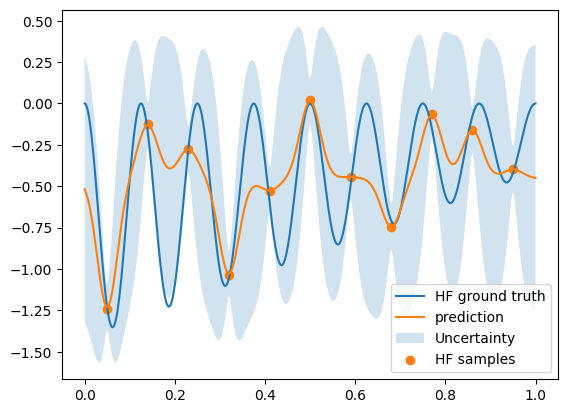

In [24]:
# get the predictions
sf_pred, sf_std = sf_model.predict(test_samples.numpy(), return_std=True)
# plot the results
fig, ax = plt.subplots()
ax.plot(test_samples, test_hf_responses_noiseless, label="HF ground truth")

ax.plot(test_samples, sf_pred, label="prediction")
ax.fill_between(test_samples.flatten(), (sf_pred - 2*sf_std).flatten(),
                (sf_pred + 2*sf_std).flatten(), alpha=0.2, label="Uncertainty")
# plot samples
ax.scatter(hf_samples, hf_responses, label="HF samples")

plt.legend()
plt.show()

In [27]:
# multi-fidelity model for the first low-fidelity model
# create the model
mf_model = HierarchicalKriging(
    design_space=np.array([[0, 1]]),
    noise_prior=0.05,)
# train the model
mf_model.train(samples=[hf_samples.numpy(), lf_samples.numpy()],
               responses=[hf_responses.numpy(), responses_lf1["lf"].numpy(),])
# save the model
with open("mf_model_lf1.pkl", "wb") as f:
    torch.save(mf_model, f)

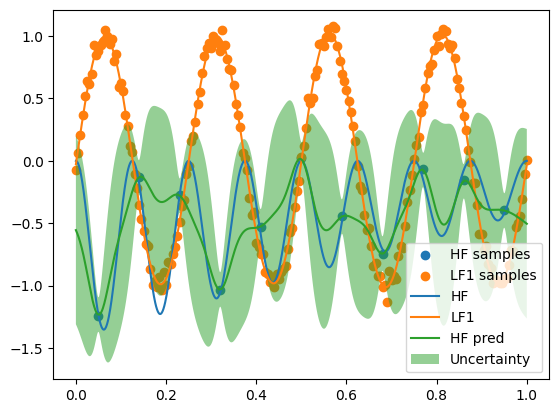

In [28]:
hf_pred, hf_pred_var = mf_model.predict(test_samples.numpy(), return_std=True)
lf1_pred = mf_model.predict_lf(test_samples.numpy())
# plot the prediction
fig, ax = plt.subplots()
# plot samples
ax.scatter(hf_samples, hf_responses, label="HF samples")
ax.scatter(lf_samples,  responses_lf1["lf"], label="LF1 samples")
ax.plot(test_samples, test_hf_responses_noiseless, label="HF")
ax.plot(test_samples, lf1_pred, label="LF1")
ax.plot(test_samples, hf_pred, label="HF pred")
# get the uncertainty
ax.fill_between(test_samples.numpy().flatten(), (hf_pred - 2*hf_pred_var).flatten(),
                (hf_pred + 2*hf_pred_var).flatten(), alpha=0.5, label="Uncertainty")

plt.legend()
plt.show()

In [29]:
# multi-fidelity model for the second low-fidelity model
# create the model
mf_model = HierarchicalKriging(
    design_space=np.array([[0, 1]]),
    noise_prior=0.05,)
# train the model
mf_model.train(samples=[hf_samples.numpy(), lf_samples.numpy()],
               responses=[hf_responses.numpy(), responses_lf2["lf"].numpy(),])
# save the model
with open("mf_model_lf2.pkl", "wb") as f:
    torch.save(mf_model, f)

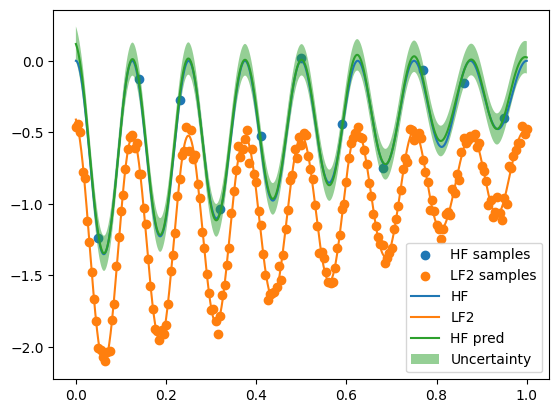

In [30]:
# plot the prediction
hf_pred, hf_pred_var = mf_model.predict(test_samples.numpy(), return_std=True)
lf2_pred = mf_model.predict_lf(test_samples.numpy())
# plot the prediction
fig, ax = plt.subplots()
# plot samples
ax.scatter(hf_samples, hf_responses, label="HF samples")
ax.scatter(lf_samples,  responses_lf2["lf"], label="LF2 samples")
ax.plot(test_samples, test_hf_responses_noiseless, label="HF")
ax.plot(test_samples, lf2_pred, label="LF2")
ax.plot(test_samples, hf_pred, label="HF pred")
# get the uncertainty
ax.fill_between(test_samples.numpy().flatten(), (hf_pred - 2*hf_pred_var).flatten(),
                (hf_pred + 2*hf_pred_var).flatten(), alpha=0.5, label="Uncertainty")

plt.legend()
plt.show()

In [31]:
# multi-fidelity model for the third low-fidelity model
# create the model
mf_model = HierarchicalKriging(
    design_space=np.array([[0, 1]]),
    noise_prior=0.05,)
# train the model
mf_model.train(samples=[hf_samples.numpy(), lf_samples.numpy()],
               responses=[hf_responses.numpy(), responses_lf3["lf"].numpy(),])
# save the model
with open("mf_model_lf3.pkl", "wb") as f:
    torch.save(mf_model, f)

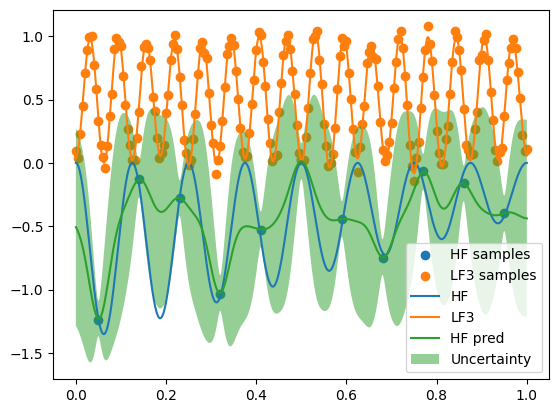

In [32]:
# plot the prediction
hf_pred, hf_pred_var = mf_model.predict(test_samples.numpy(), return_std=True)
lf3_pred = mf_model.predict_lf(test_samples.numpy())
# plot the prediction
fig, ax = plt.subplots()
# plot samples
ax.scatter(hf_samples, hf_responses, label="HF samples")
ax.scatter(lf_samples,  responses_lf3["lf"], label="LF3 samples")
ax.plot(test_samples, test_hf_responses_noiseless, label="HF")
ax.plot(test_samples, lf3_pred, label="LF3")
ax.plot(test_samples, hf_pred, label="HF pred")
# get the uncertainty
ax.fill_between(test_samples.numpy().flatten(), (hf_pred - 2*hf_pred_var).flatten(),
                (hf_pred + 2*hf_pred_var).flatten(), alpha=0.5, label="Uncertainty")

plt.legend()
plt.show()